## Maximum likelihood 

- Maximum likelihood estimation: Given some observation, what is the event/process that most likely produced to the observation?
    - e.g. $Pr(Event_x | Observation)$

- In machine learning, we usually maximise $Pr(Data | Model_1)$ vs $Pr(Data | Model_2)$ etc.
    - Pick the model that most likely produced the data

## Maximum Likelihood: Bernoulli

- Imagine you have a set of results from 10 coin tosses: `HHHHHHHHTT` Which coin most likely produced this set of results?
    - Coin 1: Pr(H) = 0.7, Pr(T) = 0.3
    - Coin 2: Pr(H) = 0.5, Pr(T) = 0.5
    - Coin 3: Pr(H) = 0.3, Pr(T) = 0.7

- By MLE:  
    - Let event E be `HHHHHHHHTT`
    - $Pr(E | Coin 1) = 0.7^{8} * 0.3^2 \approx 0.0051$
    - $Pr(E | Coin 2) = 0.5^{8} * 0.5^2 \approx 0.0010$
    - $Pr(E | Coin 3) = 0.3^{8} * 0.7^2 \approx 0.00003$
    - So, most likely that Coin 1 produced `E`

- Let's suppose we have some coin `C` where Pr(H) = p, Pr(T) = 1-p. What value of `p` will give the best chance of producing the sequence `HHHHHHHHTT`?
    - Recall that the probability of observing the sequence `HHHHHHHHTT` is $p^{8} * (1-p)^2$. This is also known as the **likelihood** of observing this event
    - To find the value of `p` that maximises likelihood, we can take derivative of the likelihood. But notice how tricky it is to solve for `p`, because of the polynomial terms!
    - A simpler way is simply to apply a log transformation to the original expression to  Since log transformation is a linear transformation, the value of `p` that maximises the likelihood will also maximise the **log-likelihood**
        - $\begin{align}
            log(p^8 * (1-p)^2) &= 8 log(p) + 2 log (1-p) \\
            \frac{d}{dp} (8 log(p) + 2 log (1-p)) = \frac{8}{p} - \frac{2}{(1-p)} &= 0 \\
            2p &= 8-8p \\
            p &= 0.8
        \end{align}$



- This can actually be generalised in a general expression for Bernoulli processes
    - Definitions
        - Let **X** be a Bernoulli process
        - Since it is Bernoulli, each trial $x_i$ takes on value of 1 with probability $p$ or 0 with probability $1-p$
        - Assuming there are $n$ such trials, total positive events is given by $\sum_{i=1}^{n} x_i$
        - Let the likelihood of some set of observations $X = \left \{  x_1, x_2, x_3, ... , x_n \right \}$ be $L(X,p)$
        - Let the log-likelihood of some set of observations $X = \left \{  x_1, x_2, x_3, ... , x_n \right \}$ be $\ell(X) = log(L(X,p))$
    - From previous example, $L(X, p) = p^{\sum_{i=1}^{n} x_i} \cdot (1-p)^{n - {\sum_{i=1}^{n} x_i}}$
    - As such, $\ell(X,p) = (\sum_{i=1}^{n} x_i) log(p) + (n - {\sum_{i=1}^{n} x_i}) log(1-p)$
    - Taking derivative:
        - $\begin{align}
            \frac{d}{dp}\ell(X, p) = \frac{(\sum_{i=1}^{n} x_i)}{p} - \frac{(n - {\sum_{i=1}^{n} x_i})}{(1-p)} = 0 \\
            (1-p) \cdot (\sum_{i=1}^{n} x_i) = p \cdot (n - \sum_{i=1}^{n} x_i) \\
            (\sum_{i=1}^{n} x_i) - p \cdot (\sum_{i=1}^{n} x_i) = n \cdot p - p \cdot (\sum_{i=1}^{n} x_i) \\
            \sum_{i=1}^{n} x_i = n \cdot p \\
            p = \frac{\sum_{i=1}^{n} x_i}{n} = \bar{X}
        \end{align}$




## Maximum Likelihood: Gaussian

- The idea is pretty much the same when applied to a Gaussian distribution; given some set of observations $X$, we can use maximum likelihood (or maximum log likelihood for simplicity), to compute the most likely candidate distribution

- Some corollaries:
    - The best candidate distribution will always be the one that matches the mean of the actual distribution
    - The best candidate distribution will always be the one that matches the variance of the actual distribution

- Visual intuition

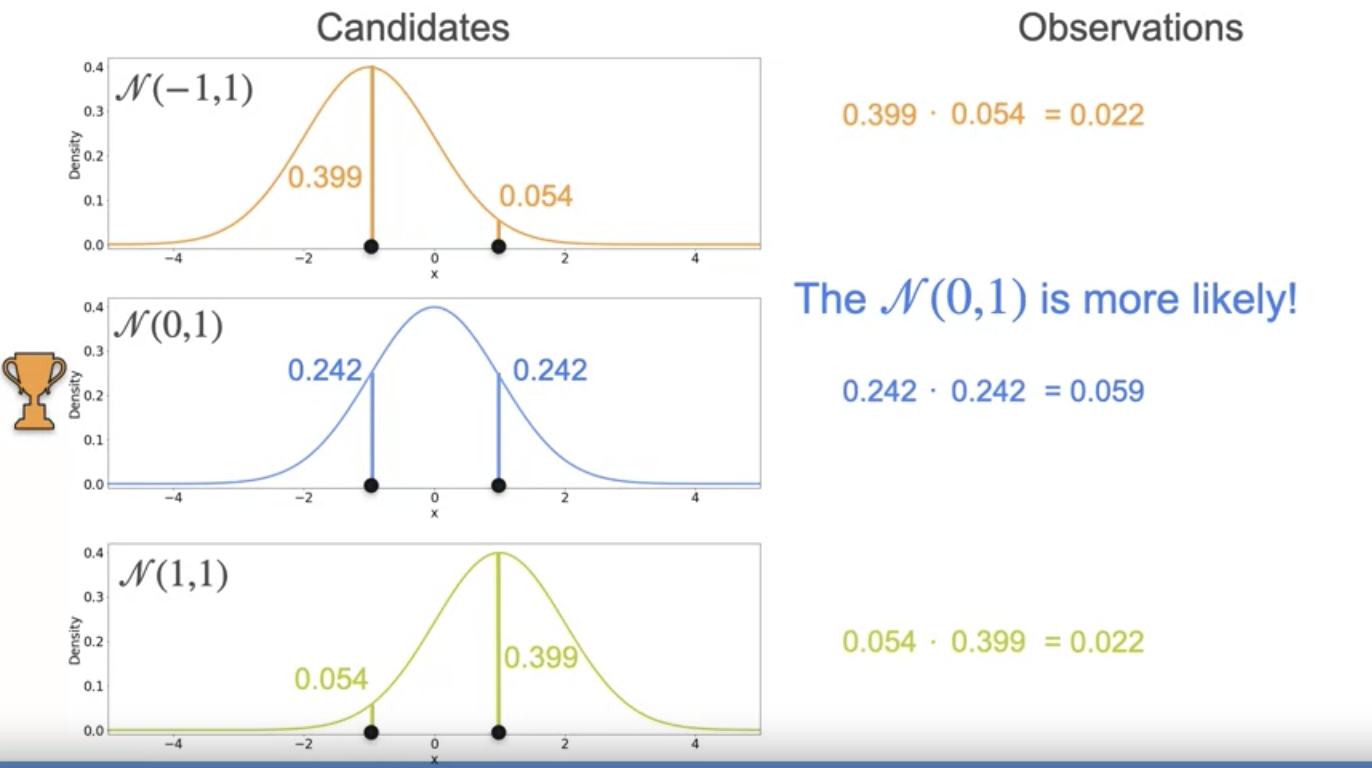

## MLE: Linear Regression

- So far, we have seen how we can use MLE to give us the most probable distribution given a event/observation. In a machine learning context, we can use the same logic to retrieve the most probable **model** given a set of observations. That is, $max Pr(Data | model)$ 
    - That is; which model produced the observed data with the highest probability

- Let's look at linear regression

- For every observation we have, we assume that it has been pulled from a Gaussian distribution (i.e. $N(0,1)$) around the midpoint that lies on the line $y = mx + c$. We then compute the best values of $m$ and $c$ that maximises $\ell(X)$

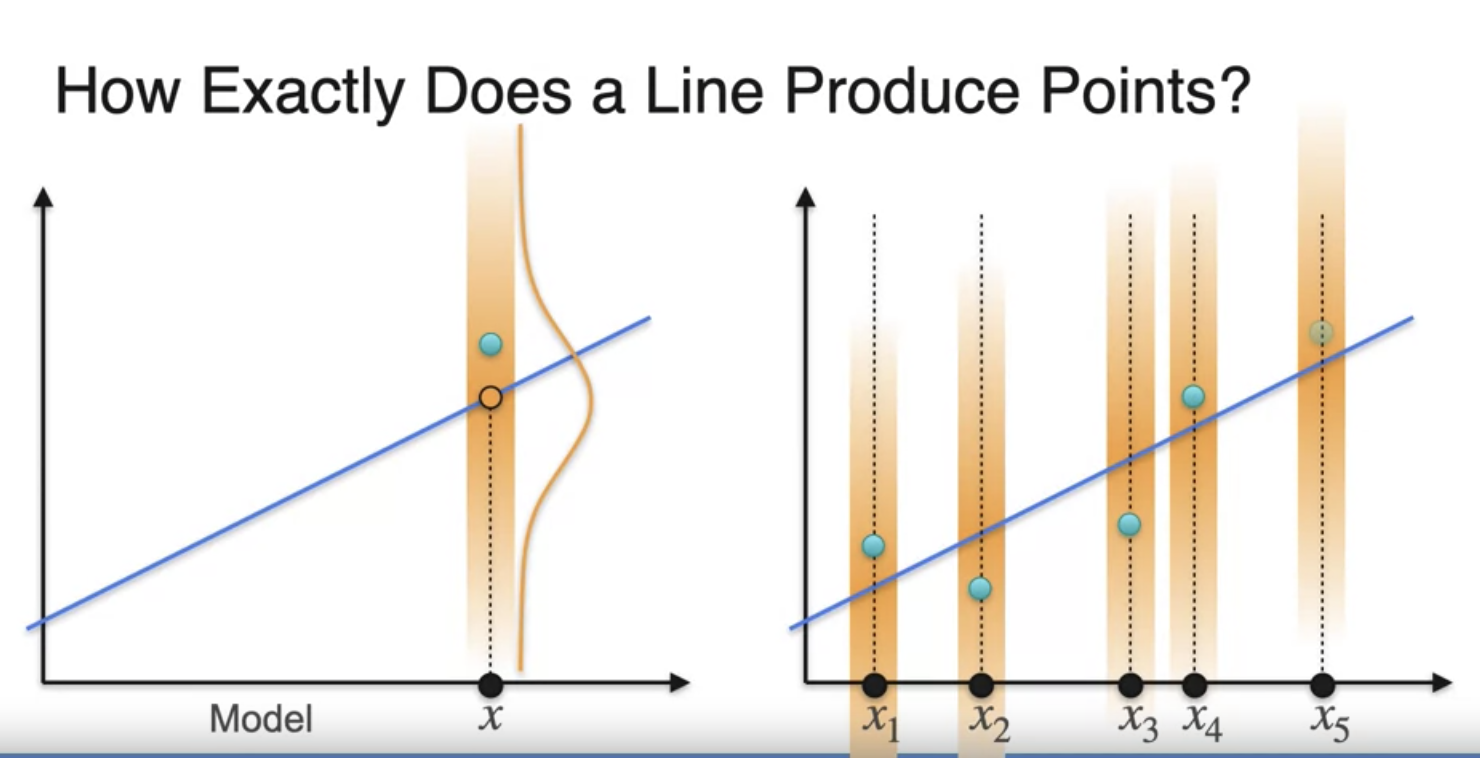



- One interesting observation is that maximising log-likelihood gets you the same result as least squares regression! In fact, there is a straightforward mathematical relationship:
    - In OLS, we are minimising the sum of squared error between the points and the actual line
        - Let $\hat{y} = \hat{m}x + \hat{c}$ be the estimated of the line
        - Let $y$ be the actual value of the points on the line
        - OLS asks that we minimise $(y - \hat{y})^2 = d_{i}^2$, where $d$ is the distance of every point from the line

    - In maximum log-likelihood, we want to maximise $\sum_{i=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} \cdot e^{-0.5 \cdot (\frac{y - \mu_{y |X=x}}{\sigma})^2}$
        - With reference to the chart above, each value $y$ is the observed blue point on the graph, and $\mu_{y | X=x}$ is the value of $\hat{y}$ when $X=x$
        - Following the assumption that we draw each point from a normal distirbution of $\sigma = 1$, the maximisation becomes $\sum_{i=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} \cdot e^{-0.5 (d_i)^2}$, where $d_i$ is the distance of every point from the line
        - Since we are maximising likelihood, we can ignore constants in the summation. This maximisation simplifies to 
            - $\begin{align}
                \text{max} \sum_{i=1}^{n} e^{- (d_i)^2} &= \text{max} \sum_{i=1}^{n} \frac{1}{e^{(d_i)^2}} \\
                &= \text{max} \sum_{i=1}^{n} \frac{1}{d_i^2} \\
                &= \text{min } d_i^2
            \end{align}$

    - Both end up minimising the same expression

## Regularisation

- MLE is a good step towards the right optimisation, but it is insufficient.
- This is because MLE only cares about how well your model fits the data, without considering issues with overfitting (more complexity than needed)
- Regularisation simply adds a new term to your loss
    - $L_1$ regularisation  
        - $\text{squared loss} + \sum_{i=1}^{n} \left | \beta_{i} \right |$
        - Regular squared loss PLUS the sum of the absolute value of the OLS coefficients (also known as the L1 Norm)
    - $L_2$ regularisation  
        - $\text{squared loss} + \sum_{i=1}^{n} \left | \beta_{i}^2 \right |$
        - Regular squared loss PLUS the sum of the absolute value of the OLS coefficients squared (also known as the L2 Norm)
    - Gives you the **regularised error**

